<a href="https://colab.research.google.com/github/ddenebb/IT_Academy_Final_Project/blob/main/Barcelona_Air_BnB_listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Barcelona AirBnB listings

This project will use data scraped from Airbnb webpage, taken from [InsideAirbnb](http://insideairbnb.com/get-the-data/). There are 4 csv files with data about listings from September 2022 to June 2023.
The point is to make an exploratory visualization and make some predictions.

In this [link ](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596)we can find a dictionary describing the dataset´s fields

In [1]:
import pandas as pd

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_10_September_2022.csv')

# Load the second listing file
df2 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_11_December_2022.csv')

# Load the third listing file
df3 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_14_March_2023.csv')

# Load the fourth listing file
df4 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_10_June_2023.csv')

# Combine the dataframes into a single dataframe
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65583 entries, 0 to 65582
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            65583 non-null  int64  
 1   listing_url                                   65583 non-null  object 
 2   scrape_id                                     65583 non-null  int64  
 3   last_scraped                                  65583 non-null  object 
 4   source                                        65583 non-null  object 
 5   name                                          65555 non-null  object 
 6   description                                   65221 non-null  object 
 7   neighborhood_overview                         38203 non-null  object 
 8   picture_url                                   65583 non-null  object 
 9   host_id                            

In [2]:
# # Examine the dataset's shape
df.shape

(65583, 75)

This function calculates the percentage of missing data for each column in the DataFrame combined_df. It prints the column name and the corresponding percentage of missing data.

In [3]:
def check_missing_value(column:'str'):
    print(f'Percentage of Missing data in \033[1m"{column}"\033[0m is \033[1m{round(df[column].isna().sum()/df[column].shape[0] * 100, 2)} %\033[0m')
for x in df.columns:
    check_missing_value(x)

Percentage of Missing data in "id" is 0.0 %
Percentage of Missing data in "listing_url" is 0.0 %
Percentage of Missing data in "scrape_id" is 0.0 %
Percentage of Missing data in "last_scraped" is 0.0 %
Percentage of Missing data in "source" is 0.0 %
Percentage of Missing data in "name" is 0.04 %
Percentage of Missing data in "description" is 0.55 %
Percentage of Missing data in "neighborhood_overview" is 41.75 %
Percentage of Missing data in "picture_url" is 0.0 %
Percentage of Missing data in "host_id" is 0.0 %
Percentage of Missing data in "host_url" is 0.0 %
Percentage of Missing data in "host_name" is 0.01 %
Percentage of Missing data in "host_since" is 0.01 %
Percentage of Missing data in "host_location" is 21.9 %
Percentage of Missing data in "host_about" is 36.28 %
Percentage of Missing data in "host_response_time" is 17.95 %
Percentage of Missing data in "host_response_rate" is 17.95 %
Percentage of Missing data in "host_acceptance_rate" is 15.79 %
Percentage of Missing data in

Typically, there is no fixed threshold for the percentage of missing data that universally applies to all situations. However, the following general guidelines must be  considered:

*   Low Missing Data Percentage: If a column has a very low percentage of missing data (e.g., less than 5%), is possible to simply drop the rows with missing values or use imputation methods to fill in the missing values.
*   Moderate Missing Data Percentage: For columns with a moderate percentage of missing data (e.g., between 5% and 20%), more sophisticated imputation techniques can exploreed, such as mean or median imputation, regression imputation, or using machine learning models to predict the missing values.

*   High Missing Data Percentage: If a column has a high percentage of missing data (e.g., more than 20% or 30%), removing the column entirely from your analysis must be considered, as the missing data might significantly impact the accuracy of the model.

It's important to assess the nature of missing data and the impact it may have on the analysis.

In [4]:
print(df['price'].dtype)

object


Convert Price to Numeric: The 'price' column is currently of object data type. To perform numerical operations and analysis, it's better to convert it to a numeric data type. Remove the dollar sign ($) and any other non-numeric characters, and convert it to a float or integer data type. For example:

In [5]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


<ipython-input-5-2b1de35abd00>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [6]:
print(df['price'].dtype)

float64


In [7]:
outlier = df[df['price'] > 600]
outlier_ids = outlier['listing_url']
print(outlier_ids)

127                  https://www.airbnb.com/rooms/267816
296                  https://www.airbnb.com/rooms/602374
449                  https://www.airbnb.com/rooms/972024
493                  https://www.airbnb.com/rooms/917308
500                 https://www.airbnb.com/rooms/1005420
                              ...                       
65535    https://www.airbnb.com/rooms/909219074809323749
65541    https://www.airbnb.com/rooms/909234706833331485
65543    https://www.airbnb.com/rooms/909236852416780922
65566    https://www.airbnb.com/rooms/909268254188300159
65571    https://www.airbnb.com/rooms/910007540851824571
Name: listing_url, Length: 1152, dtype: object


In [8]:
num_outliers = len(outlier_ids)
print(f"Number of outliers with prices greater than 600: {num_outliers}")

Number of outliers with prices greater than 600: 1152


In [9]:
# Remove irrelevant columns (e.g., 'scrape_id', 'source', etc.)
columns_to_remove = ['scrape_id', 'source', 'host_url', 'host_thumbnail_url', "first_review", "host_neighbourhood", "neighbourhood", "bathrooms", 'calendar_updated', "last_review", "review_scores_rating" ,"review_scores_accuracy" , "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value" , "license", "reviews_per_month", 'minimum_nights', 'maximum_nights','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped']  # List all irrelevant columns
df.drop(columns=columns_to_remove, inplace=True)

# Reset the index after filtering
df.reset_index(drop=True, inplace=True)


In [10]:
df.shape

(65583, 43)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65583 entries, 0 to 65582
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            65583 non-null  int64  
 1   listing_url                                   65583 non-null  object 
 2   last_scraped                                  65583 non-null  object 
 3   name                                          65555 non-null  object 
 4   description                                   65221 non-null  object 
 5   neighborhood_overview                         38203 non-null  object 
 6   picture_url                                   65583 non-null  object 
 7   host_id                                       65583 non-null  int64  
 8   host_name                                     65575 non-null  object 
 9   host_since                                    65575 non-null 

Handle Missing Values in Bedrooms: The 'bedrooms' column has some missing values. You can either drop the rows with missing values or fill them with a suitable value (e.g., mean, median, or mode). If you choose to fill the missing values, you can use the fillna() method. For example, to fill with the most frequent:

In [12]:
# Calculate the most frequent value (mode) of the 'bedrooms' column
most_frequent_bedrooms = df['bedrooms'].mode().iloc[0]

# Replace missing values with the most frequent value
df['bedrooms'].fillna(most_frequent_bedrooms, inplace=True)

# Now the missing values in the 'bedrooms' column have been replaced with the most frequent value.


In [13]:
df['last_scraped'] = pd.to_datetime(df['last_scraped'])

In [14]:
price_stats = df['price'].describe()
print(price_stats)

count    65583.000000
mean       162.184847
std        947.481989
min          0.000000
25%         50.000000
50%         95.000000
75%        175.000000
max      90000.000000
Name: price, dtype: float64


Based on the price statistics, it seems like there are some listings with very high prices (maximum value of 90000) and potentially some with zero prices. To filter out these outliers and get a better understanding of the typical price range, some reasonable price limits can be set .

For example, let's consider that prices above $230 and prices equal to or below $20 are outliers. Then filter the listings based on these conditions:

In [15]:
# Filter out listings with prices above $300 and prices equal to or below $20
df = df[(df['price'] <= 230) & (df['price'] > 20)]

# Get the count of filtered listings
num_filtered_listings = df.shape[0]

# Display the count of filtered listings
print(f"Number of filtered listings: {num_filtered_listings}")

Number of filtered listings: 53582


In [16]:
df['price'].describe()

count    53582.000000
mean        95.105968
std         55.297622
min         21.000000
25%         49.000000
50%         82.000000
75%        134.000000
max        230.000000
Name: price, dtype: float64

<ipython-input-17-49c5696f2690>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


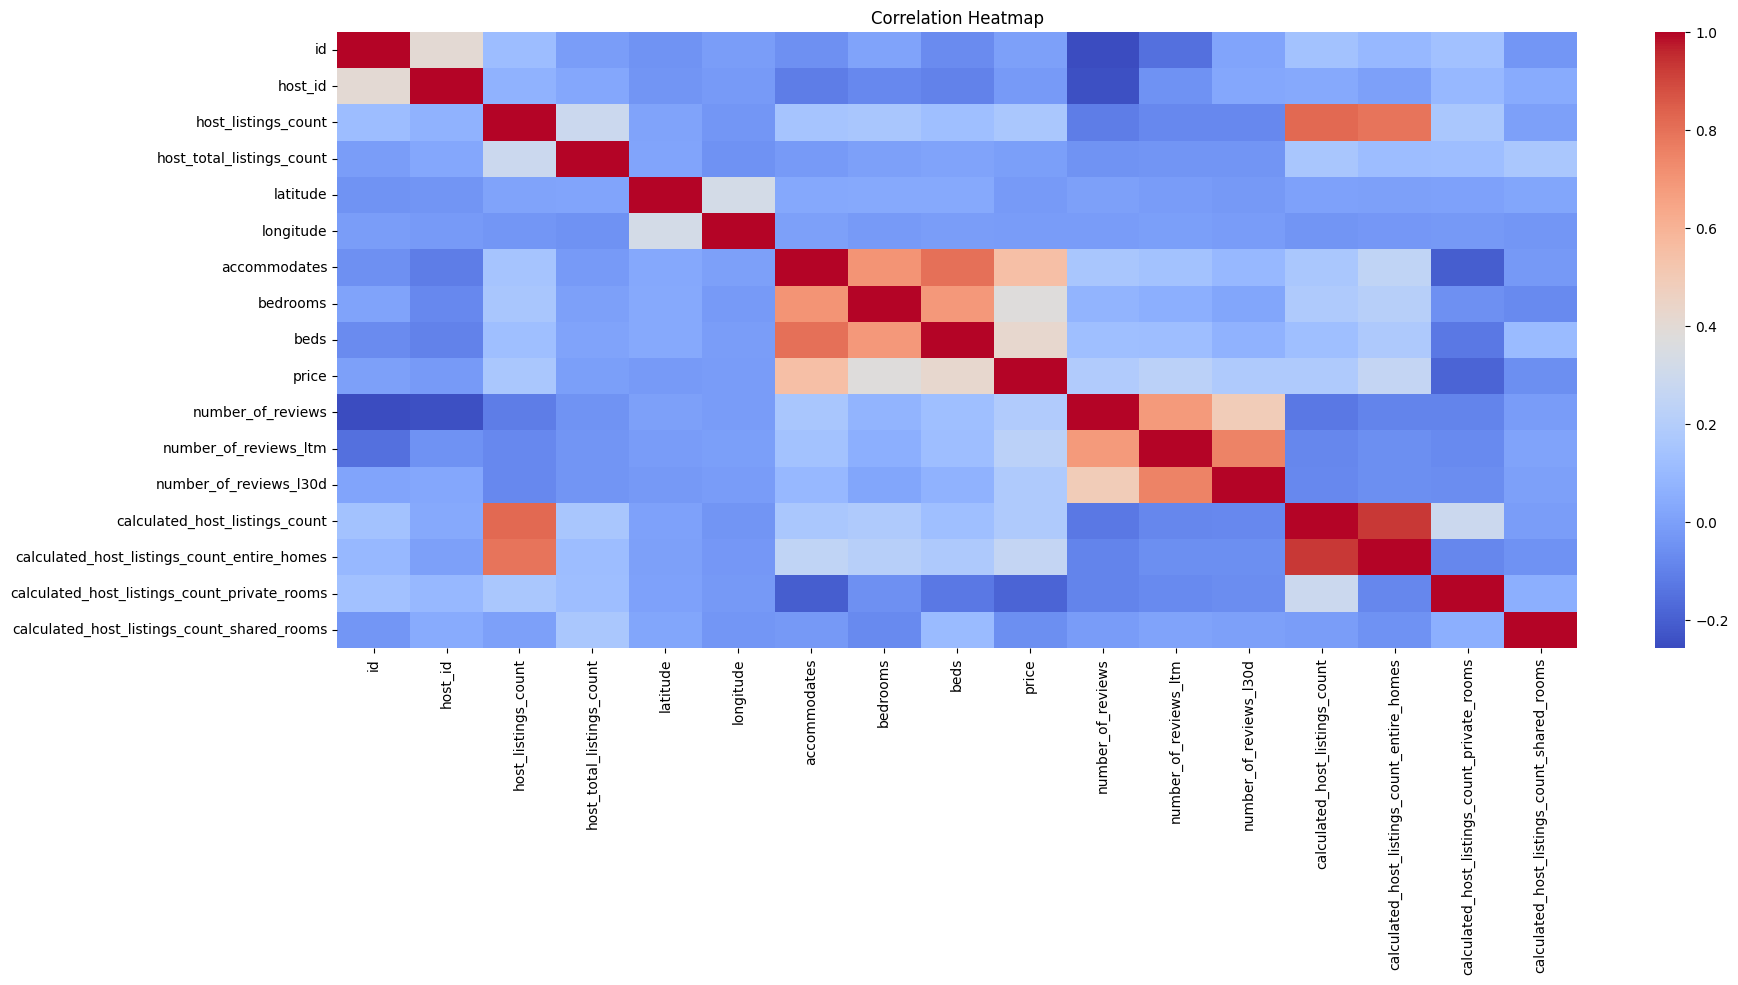

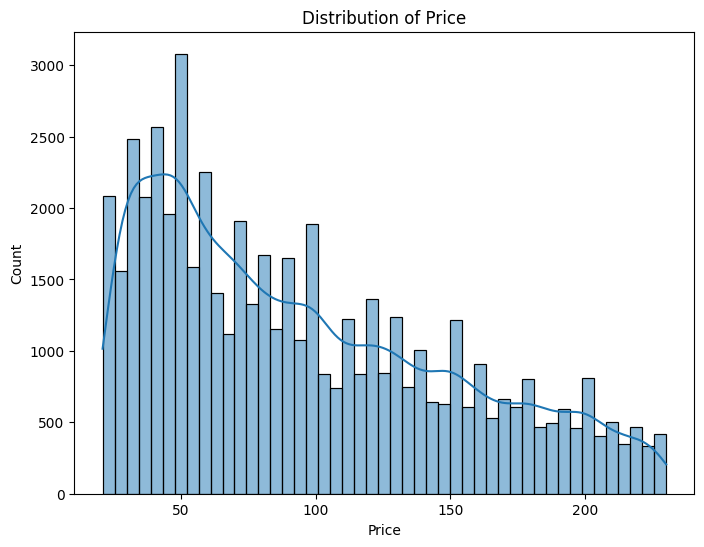

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the dataset

# Correlation analysis
correlation = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable (price)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


I will plot the price by neighborhood and will order the neighborhoods by the number of listings from left to right on the nested boxplot, creating a new DataFrame with the counts of listings for each neighborhood and then sort the neighborhoods based on these counts.

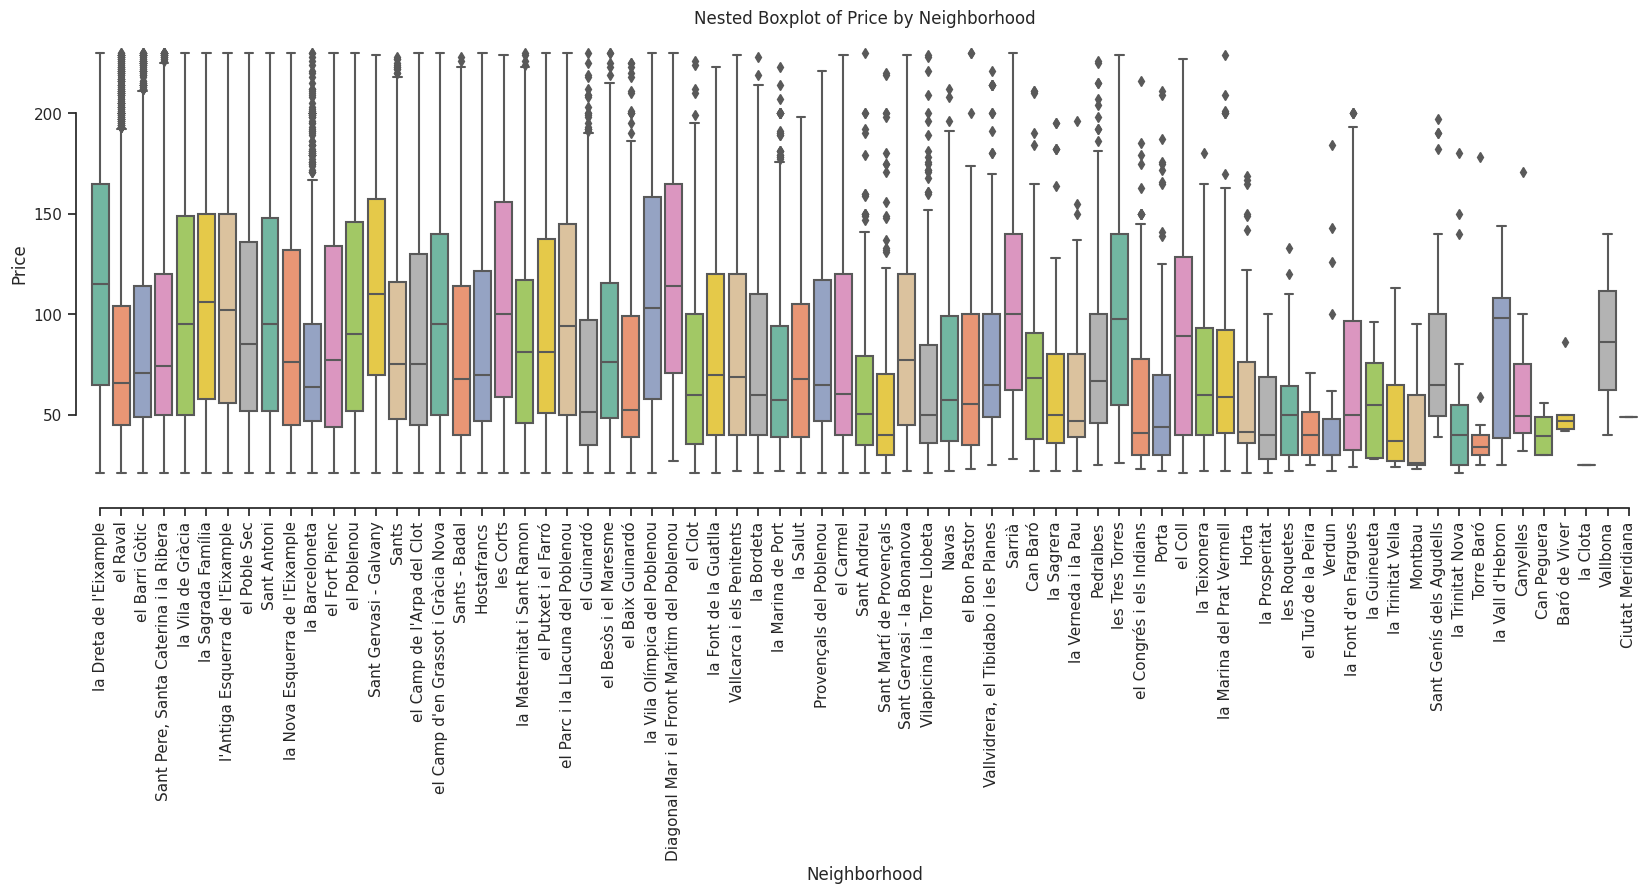

In [18]:
# Create a DataFrame with the counts of listings for each neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood_cleansed', 'count']

# Sort the neighborhoods based on the counts
neighborhood_counts = neighborhood_counts.sort_values(by='count', ascending=False)

# Set the seaborn theme and palette
sns.set_theme(style="ticks", palette="pastel")

# Adjust figure size
plt.figure(figsize=(20, 6))

# Draw the nested boxplot
sns.boxplot(x='neighbourhood_cleansed', y="price",
            palette="Set2",
            data=df,
            order=neighborhood_counts['neighbourhood_cleansed'])  # Use the sorted order

sns.despine(offset=10, trim=True)

# Adjust plot title and axes labels
plt.title('Nested Boxplot of Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()



To assign a unique code to each unique neighborhood, a mapping dictionary can createed where each unique neighborhood is associated with a unique code.

In this code, unique_neighborhoods stores all the unique neighborhood names from the 'neighbourhood_cleansed' column. Then, a dictionary neighborhood_code_map is created, where each unique neighborhood is mapped to a unique code using the enumerate() function.

Finally, the map() function is used to map the neighborhood names in the 'neighbourhood_cleansed' column to their respective codes from the neighborhood_code_map dictionary. The codes are then stored in a new column called 'neighborhood_code' in the dataframe df.

Now the 'neighborhood_code' column can be used to represent neighborhoods in the heatmap or any other visualization where numerical codes are required instead of the original neighborhood names.

In [19]:
# Get unique neighborhoods
unique_neighborhoods = df['neighbourhood_cleansed'].unique()

# Create a mapping dictionary for neighborhood codes
neighborhood_code_map = {neighborhood: code for code, neighborhood in enumerate(unique_neighborhoods)}

# Add a new column 'neighborhood_code' to the dataframe
df['neighborhood_code'] = df['neighbourhood_cleansed'].map(neighborhood_code_map)
print(df['neighborhood_code'].unique())


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


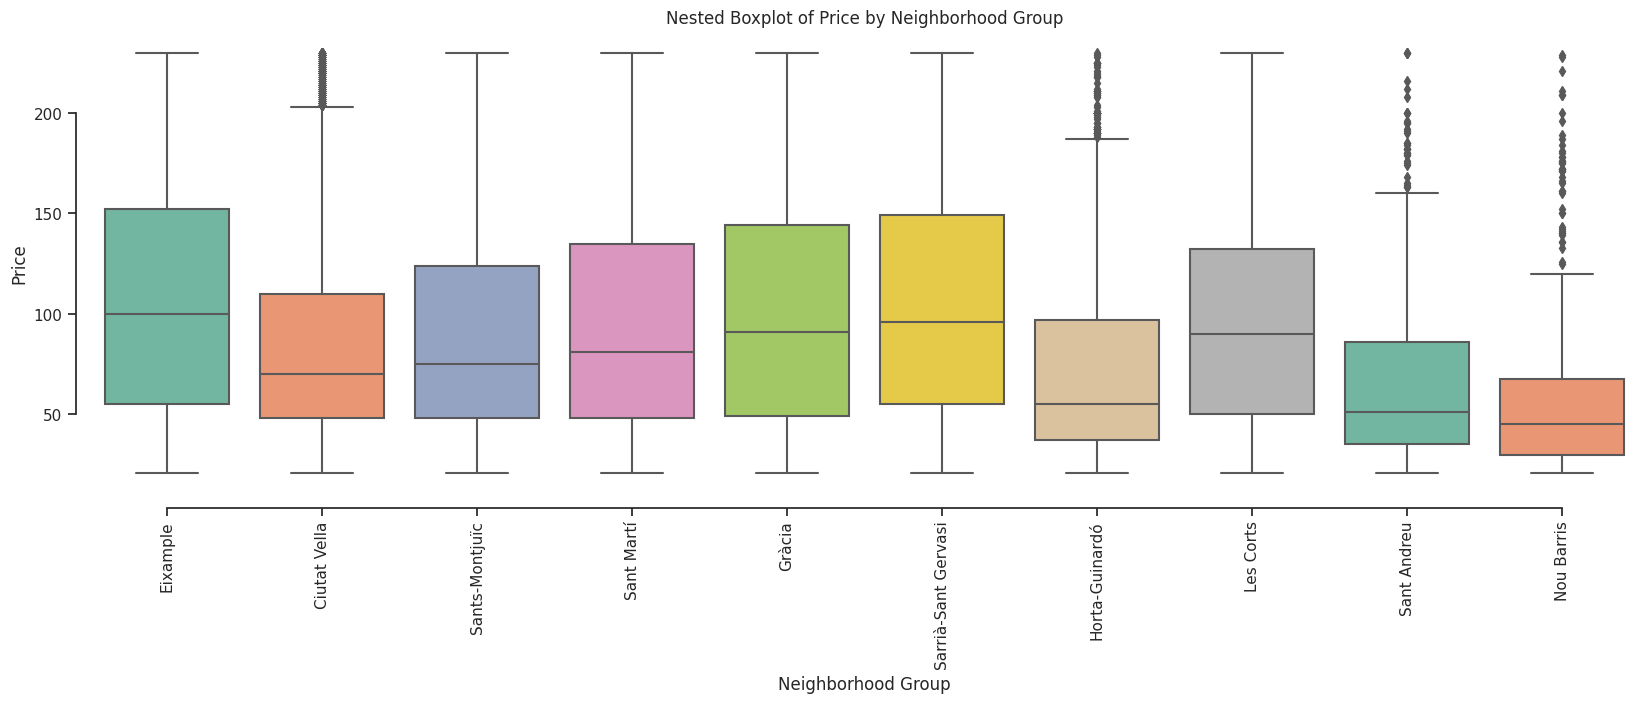

In [20]:
# Create a DataFrame with the counts of listings for each neighborhood group
neighborhood_group_counts = df['neighbourhood_group_cleansed'].value_counts().reset_index()
neighborhood_group_counts.columns = ['neighbourhood_group_cleansed', 'count']

# Sort the neighborhoods based on the counts
neighborhood_group_counts = neighborhood_group_counts.sort_values(by='count', ascending=False)

# Set the seaborn theme and palette
sns.set_theme(style="ticks", palette="pastel")

# Adjust figure size
plt.figure(figsize=(20, 6))

# Draw the nested boxplot
sns.boxplot(x='neighbourhood_group_cleansed', y="price",
            palette="Set2",
            data=df,
            order=neighborhood_group_counts['neighbourhood_group_cleansed'])  # Use the sorted order

sns.despine(offset=10, trim=True)

# Adjust plot title and axes labels
plt.title('Nested Boxplot of Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53582 entries, 0 to 65582
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            53582 non-null  int64         
 1   listing_url                                   53582 non-null  object        
 2   last_scraped                                  53582 non-null  datetime64[ns]
 3   name                                          53554 non-null  object        
 4   description                                   53307 non-null  object        
 5   neighborhood_overview                         30417 non-null  object        
 6   picture_url                                   53582 non-null  object        
 7   host_id                                       53582 non-null  int64         
 8   host_name                                     53574 non-null  obje

Let's start with the data preparation steps. In this case, I want to predict the demand for different room types based on the neighborhood. To do that, I'll need to convert the categorical columns 'room_type' and 'neighborhood_cleansed' into numerical representations using one-hot encoding. Here's how I can achieve that:

In [22]:
print(df.columns)


Index(['id', 'listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'has_availability', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'neighborhood_co

In [23]:
# Let's assume df is the DataFrame containing all the data
# First, I'll select the relevant columns for my analysis

selected_columns = ['room_type', 'neighbourhood_cleansed', 'property_type', 'accommodates']
df = df[selected_columns]

# Next, I'll use one-hot encoding to convert the categorical columns into numerical representations

# For 'room_type' column
room_type_encoded = pd.get_dummies(df['room_type'], prefix='room_type')
df = pd.concat([df, room_type_encoded], axis=1)
df.drop('room_type', axis=1, inplace=True)

# For 'neighbourhood_cleansed' column
neighborhood_encoded = pd.get_dummies(df['neighbourhood_cleansed'], prefix='neighborhood')
df = pd.concat([df, neighborhood_encoded], axis=1)
df.drop('neighbourhood_cleansed', axis=1, inplace=True)

# Now my DataFrame 'combined_df' contains numerical representations of 'room_type' and 'neighbourhood_cleansed' columns using one-hot encoding


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53582 entries, 0 to 65582
Data columns (total 79 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   property_type                                              53582 non-null  object
 1   accommodates                                               53582 non-null  int64 
 2   room_type_Entire home/apt                                  53582 non-null  uint8 
 3   room_type_Hotel room                                       53582 non-null  uint8 
 4   room_type_Private room                                     53582 non-null  uint8 
 5   room_type_Shared room                                      53582 non-null  uint8 
 6   neighborhood_Baró de Viver                                 53582 non-null  uint8 
 7   neighborhood_Can Baró                                      53582 non-null  uint8 
 8   neighborhood_Can

Explanation:

    I defined a list called 'selected_columns' with the columns I want to keep for my analysis, which includes 'room_type', 'neighborhood_cleansed', 'property_type', and 'accommodates'.

    I created a new DataFrame 'df' by selecting only the columns from the original df that are listed in 'selected_columns'.

    For the 'room_type' column, I used the pd.get_dummies() function, which performs one-hot encoding. This function converts each unique value in the 'room_type' column into a new binary column, where a 1 indicates the presence of that room type and a 0 indicates its absence. I used the prefix 'room_type_' for the new columns to distinguish them.

    I concatenated the one-hot encoded 'room_type' columns with the original df using pd.concat() and dropped the original 'room_type' column as we no longer need it.

    Similarly, I performed one-hot encoding for the 'neighborhood_cleansed' column using pd.get_dummies() and the prefix 'neighborhood_' for the new columns.

    Finally, I concatenated the one-hot encoded 'neighborhood_cleansed' columns with df and dropped the original 'neighborhood_cleansed' column.

Now, my DataFrame contains numerical representations of 'room_type' and 'neighborhood_cleansed' columns, which can be used as features for further data analysis and exploration. We can use these features to gain insights into the relationships between room types and neighborhood cleansed, or even perform clustering or classification tasks to understand patterns in accommodation types and their distribution across different neighborhoods.

let's explore the relationship between the target variable (demand) and the selected features using visualizations. Since there is no 'demand' column in the provided dataset, we can analyze the relationship between the target variable 'price' and the selected features: 'property_type', 'room_type', and 'accommodates' in different neighborhoods.

To do this, I will create bar plots and box plots to observe how the 'price' (target variable) varies across different property types, room types, and accommodates values in different neighborhoods.

First, let's create a bar plot to visualize the average 'price' for different 'property_type' values:

Step 1: Prepare the Data
Include the additional columns for 'room_type' feature and separate the features (X) and target variables (y) for each prediction task.

In [25]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df
# Separate features (X) and target variables (y)
X_neighborhood = df.drop(columns=['property_type', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'accommodates'])
y_property_type = df['property_type']
y_room_type = df[['room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']]
y_accommodates = df['accommodates']

# Split the data into training and testing sets
X_train, X_test, y_prop_train, y_prop_test, y_room_train, y_room_test, y_acc_train, y_acc_test = train_test_split(
    X_neighborhood, y_property_type, y_room_type, y_accommodates, test_size=0.2, random_state=42
)




Step 2: Build Prediction Models
Build separate models for each prediction task using suitable machine learning algorithms.
For 'property_type' prediction (classification):

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
property_type_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
property_type_classifier.fit(X_train, y_prop_train)

# Make predictions on the test set
y_prop_pred = property_type_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_prop_test, y_prop_pred)
print(f'Accuracy for property_type prediction: {accuracy:.2f}')


Accuracy for property_type prediction: 0.50


For 'room_type' prediction (classification):

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
room_type_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
room_type_classifier.fit(X_train, y_room_train)

# Make predictions on the test set
y_room_pred = room_type_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_room_test, y_room_pred)
print(f'Accuracy for room_type prediction: {accuracy:.2f}')


Accuracy for room_type prediction: 0.60


For 'accommodates' prediction (regression):

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the regressor
accommodates_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
accommodates_regressor.fit(X_train, y_acc_train)

# Make predictions on the test set
y_acc_pred = accommodates_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_acc_test, y_acc_pred)
print(f'Mean Squared Error for accommodates prediction: {mse:.2f}')


Mean Squared Error for accommodates prediction: 2.85
